## 7. Feature Importance Analysis

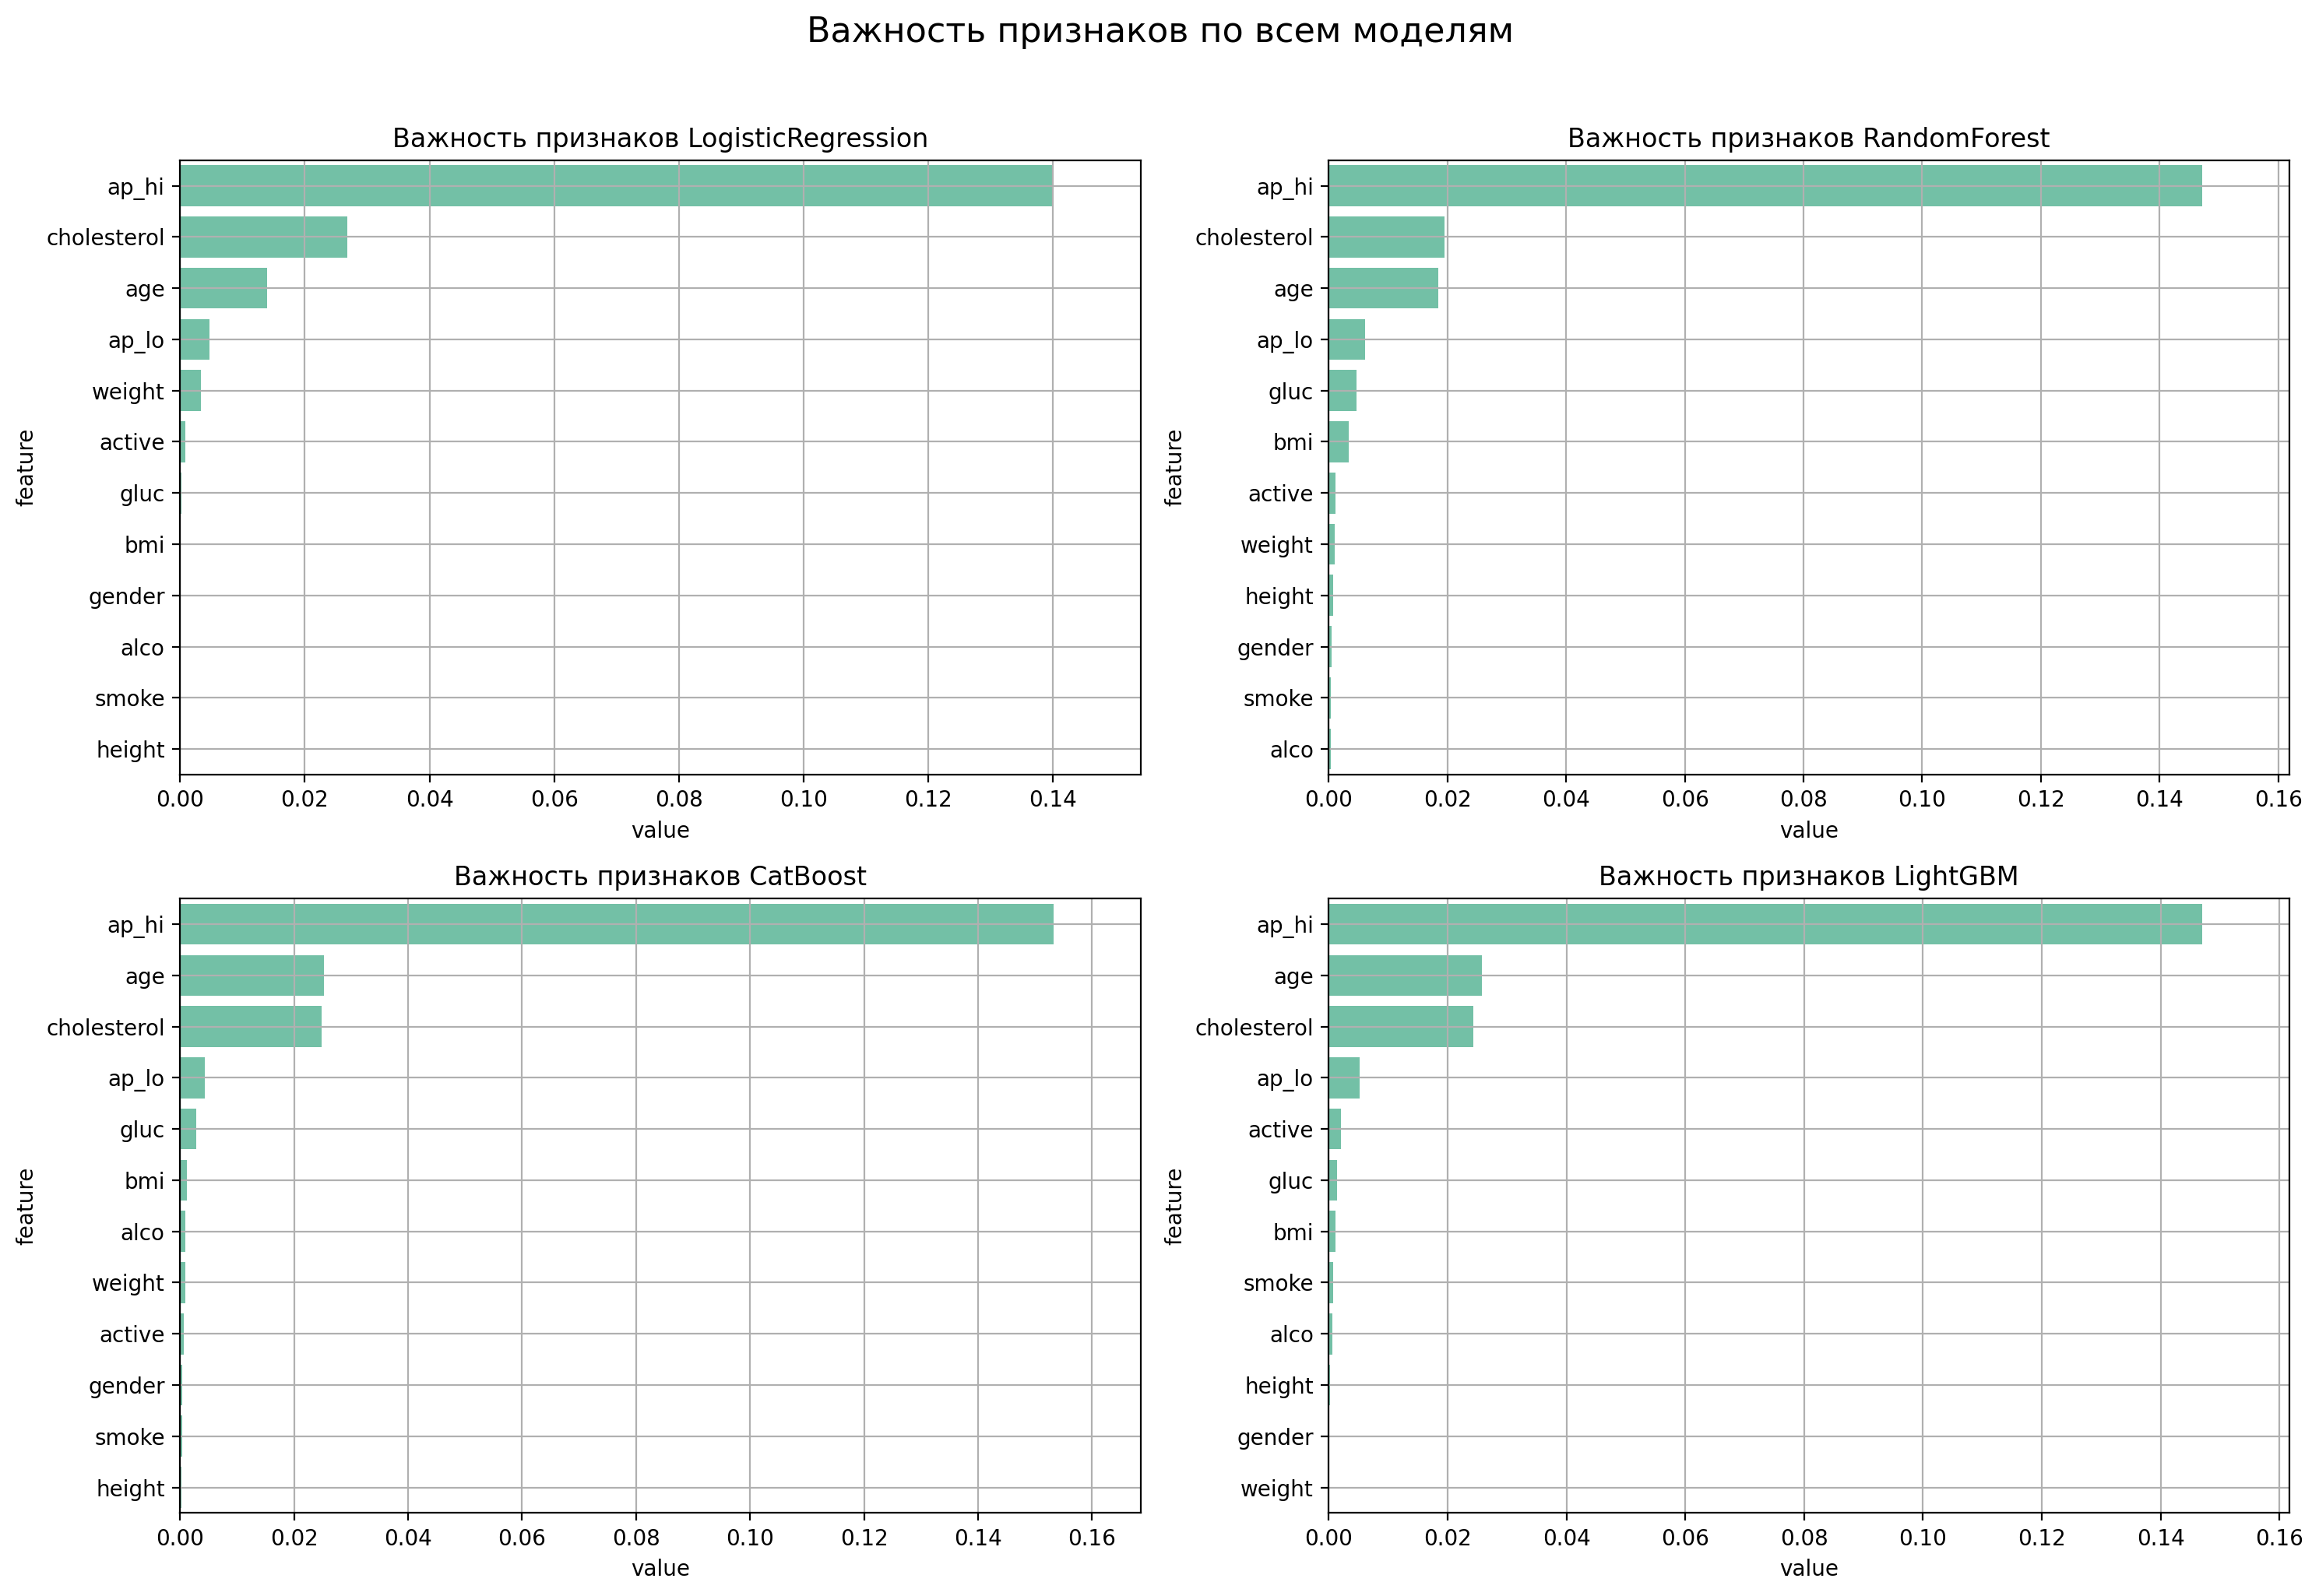

In [76]:
# Построение датафрейма важности признаков Logistic Regression
perm = permutation_importance(final_lr,
                              X_valid_scale,
                              y_valid,
                              random_state=RAND,
                              n_repeats=10)
perm_df = pd.DataFrame({
    'feature': full_features_names,
    'value': perm['importances_mean']
})

cholesterol_mask = perm_df.feature.str.startswith('cholesterol_')  # Объединяем все признаки cholesterol_ в один
cholesterol_importance = perm_df.loc[cholesterol_mask, 'value'].sum()  # Суммируем важность cholesterol

gluc_mask = perm_df.feature.str.startswith('gluc_')  # Объединяем все признаки gluc_ в один
gluc_importance = perm_df.loc[gluc_mask, 'value'].sum()  # Суммируем важность gluc

perm_df = perm_df[~(cholesterol_mask | gluc_mask)]
perm_df = pd.concat([perm_df,
                             pd.DataFrame({
                                 'feature': ['cholesterol', 'gluc'],
                                 'value': [cholesterol_importance, gluc_importance]
                                          })
                            ])
perm_df = perm_df.sort_values(by='value', ascending=False).reset_index(drop=True)

# Формирование subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10), dpi=200)

# Первый график
sns.barplot(x=perm_df.value, y=perm_df.feature, orient='h', color='mediumaquamarine', ax=ax[0,0])
ax[0,0].set_xlim(0, perm_df.value.max() * 1.1)
ax[0,0].set_title("Важность признаков LogisticRegression")
ax[0,0].grid()


# Построение датафрейма важности признаков Random Forest
perm = permutation_importance(final_rfc,
                              X_valid_scale,
                              y_valid,
                              random_state=RAND,
                              n_repeats=10)
perm_df = pd.DataFrame({
    'feature': full_features_names,
    'value': perm['importances_mean']
})

cholesterol_mask = perm_df.feature.str.startswith('cholesterol_')  # Объединяем все признаки cholesterol_ в один
cholesterol_importance = perm_df.loc[cholesterol_mask, 'value'].sum()  # Суммируем важность cholesterol

gluc_mask = perm_df.feature.str.startswith('gluc_')  # Объединяем все признаки gluc_ в один
gluc_importance = perm_df.loc[gluc_mask, 'value'].sum()  # Суммируем важность gluc

perm_df = perm_df[~(cholesterol_mask | gluc_mask)]
perm_df = pd.concat([perm_df,
                             pd.DataFrame({
                                 'feature': ['cholesterol', 'gluc'],
                                 'value': [cholesterol_importance, gluc_importance]
                                          })
                            ])
perm_df = perm_df.sort_values(by='value', ascending=False).reset_index(drop=True)

# Второй график
sns.barplot(x=perm_df.value, y=perm_df.feature, orient='h', color='mediumaquamarine', ax=ax[0,1])
ax[0,1].set_xlim(0, perm_df.value.max() * 1.1)
ax[0,1].set_title("Важность признаков RandomForest")
ax[0,1].grid()


# Построение датафрейма важности признаков CatBoost
perm = permutation_importance(final_cb,
                              X_valid_scale,
                              y_valid,
                              random_state=RAND,
                              n_repeats=10)
perm_df = pd.DataFrame({
    'feature': full_features_names,
    'value': perm['importances_mean']
})

cholesterol_mask = perm_df.feature.str.startswith('cholesterol_')  # Объединяем все признаки cholesterol_ в один
cholesterol_importance = perm_df.loc[cholesterol_mask, 'value'].sum()  # Суммируем важность cholesterol

gluc_mask = perm_df.feature.str.startswith('gluc_')  # Объединяем все признаки gluc_ в один
gluc_importance = perm_df.loc[gluc_mask, 'value'].sum()  # Суммируем важность gluc

perm_df = perm_df[~(cholesterol_mask | gluc_mask)]
perm_df = pd.concat([perm_df,
                             pd.DataFrame({
                                 'feature': ['cholesterol', 'gluc'],
                                 'value': [cholesterol_importance, gluc_importance]
                                          })
                            ])
perm_df = perm_df.sort_values(by='value', ascending=False).reset_index(drop=True)

# Третий график
sns.barplot(x=perm_df.value, y=perm_df.feature, orient='h', color='mediumaquamarine', ax=ax[1,0])
ax[1,0].set_xlim(0, perm_df.value.max() * 1.1)
ax[1,0].set_title("Важность признаков CatBoost")
ax[1,0].grid()


# Построение датафрейма важности признаков LightGBM
perm = permutation_importance(final_lgbm,
                              X_valid_scale,
                              y_valid,
                              random_state=RAND,
                              n_repeats=10)
perm_df = pd.DataFrame({
    'feature': full_features_names,
    'value': perm['importances_mean']
})

cholesterol_mask = perm_df.feature.str.startswith('cholesterol_')  # Объединяем все признаки cholesterol_ в один
cholesterol_importance = perm_df.loc[cholesterol_mask, 'value'].sum()  # Суммируем важность cholesterol

gluc_mask = perm_df.feature.str.startswith('gluc_')  # Объединяем все признаки gluc_ в один
gluc_importance = perm_df.loc[gluc_mask, 'value'].sum()  # Суммируем важность gluc

perm_df = perm_df[~(cholesterol_mask | gluc_mask)]
perm_df = pd.concat([perm_df,
                             pd.DataFrame({
                                 'feature': ['cholesterol', 'gluc'],
                                 'value': [cholesterol_importance, gluc_importance]
                                          })
                            ])
perm_df = perm_df.sort_values(by='value', ascending=False).reset_index(drop=True)

# Четвертый график
sns.barplot(x=perm_df.value, y=perm_df.feature, orient='h', color='mediumaquamarine', ax=ax[1,1])
ax[1,1].set_xlim(0, perm_df.value.max() * 1.1)
ax[1,1].set_title("Важность признаков LightGBM")
ax[1,1].grid()


fig.suptitle('Важность признаков по всем моделям', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

По оценке всех моделей наибольшее влияние оказывает признак ap_hi, отражающий уровень систолического давления. Существенно меньший, но сопоставимый вклад вносят возраст (age) и уровень холестерина (cholesterol). Влияние диастолического давления (ap_lo) заметно ниже. Остальные признаки практически не оказывают значимого влияния на предсказание.

## 8. Final Model Evaluation on Hold-out Test Set

In [77]:
y_pred = stacking_model.predict(X_test_scale)
y_prob = stacking_model.predict_proba(X_test_scale)

metrics = get_metrics_classifier(y_test, y_pred, y_prob, 'Testing The Best Model')
df_metrics = pd.concat([df_metrics, metrics]).reset_index(drop=True)
df_metrics.style.apply(
    lambda df: ['background-color: mediumaquamarine;  color: black' if i == df.index[-1] else '' for i in df.index],
    axis=0
)

,model,ROC_AUC,Recall/Sensitivity,Precision/PPV,NPV,f1,Accuracy,Average_Precision
0,LogisticRegressionBase,0.797516,0.660122,0.765308,0.706958,0.708834,0.731845,0.781649
1,RandomForestBase,0.775024,0.689574,0.720115,0.708464,0.704514,0.713981,0.758449
2,CatBoostBase,0.806609,0.687610,0.765799,0.722193,0.724602,0.741553,0.792025
3,LightGBMBase,0.806821,0.685254,0.764680,0.720537,0.722792,0.740097,0.789321
4,LogisticRegression,0.797551,0.665619,0.761627,0.708839,0.710394,0.731650,0.781747
5,RandomForest,0.805949,0.666209,0.776075,0.713225,0.716957,0.739903,0.789520
6,CatBoost,0.807186,0.688396,0.764501,0.722261,0.724455,0.741068,0.792843
7,LightGBM,0.806898,0.680738,0.766527,0.718539,0.721090,0.739612,0.788685
8,Staking,0.807315,0.687610,0.763462,0.721512,0.723554,0.740194,0.792863
9,Testing The Best Model,0.798451,0.694679,0.747675,0.720726,0.720204,0.733107,0.777680


## 9. Findings

### Нереализованные идеи

Некоторые идеи, задуманные на начальном этапе проекта, не были реализованы. Например, попытка **полиномизации признаков** не привела к улучшению качества моделей, поэтому на этом этапе было принято решение отказаться от её использования. Также из-за **высокой вычислительной стоимости** и **невысокой эффективности** был исключён алгоритм **SVM**.

---

### Обработка данных

Ещё несколько слов о данных. В процессе предварительного анализа были обнаружены ошибки в колонках:

- `ap_hi` — систолическое давление  
- `ap_lo` — диастолическое давление  
- а также аномальные значения в колонках `height` (рост) и `weight` (вес)

Конечно, можно было бы удалить строки с аномалиями, и, возможно, модели отработали бы лучше. Однако в рамках этого проекта было принято решение **максимально сохранить данные**. Поскольку это пет-проект, одной из его целей стало продемонстрировать способность **анализировать**, **рассуждать** и **находить решения в нестандартных ситуациях**.

---

### Моделирование

Была предпринята попытка построения нейросетевой модели (**MLP**), однако в процессе стало очевидно, что на столь простых табличных данных её применение неоправданно — это, по сути, *«выстрел из пушки по воробьям»*. Результаты **MLP** оказались хуже, чем у классических моделей.

В итоговой версии проекта остались 4 модели машинного обучения:

- **Logistic Regression**
- **Random Forest**
- **CatBoost**
- **LightGBM**

Для каждой из них был реализован **baseline-вариант**, а затем выполнен **подбор гиперпараметров** с использованием `RandomizedSearchCV`.

Финальную производительность обеспечил **стэкинг лучших моделей**, показавший наилучший результат на валидационной выборке.

---

### Признаки и интерпретация

Выдвинутая на этапе EDA гипотеза о возможном **совместном влиянии признаков "вес" и "возраст"** на целевую переменную осталась без проверки из-за отказа от полиномиальных признаков.

По результатам анализа важности признаков, тройка наиболее значимых была подтверждена всеми моделями:

1. `ap_hi` — уровень систолического давления *(наиболее сильный коррелятор с целевой переменной)*  
2. `age` — возраст  
3. `cholesterol` — уровень холестерина  

Остальные признаки оказали значительно меньшее влияние на прогнозирование.

> **Практический вывод:**  
> Если у человека регулярно наблюдается **повышенное систолическое давление** и **возраст превышает 50 лет**, стоит пройти медицинское обследование и уделить внимание состоянию сердечно-сосудистой системы.

---

### Оценка качества

Метрики на финальной выборке оказались немного ниже по большинству показателей по сравнению с валидацией. Это может быть связано с особенностями случайного разбиения данных с помощью `train_test_split`. Тем не менее, значения метрик остаются в пределах допустимого и не указывают на переобучение модели.

📌 Особенно важно:

- **Recall (Полнота)** — ключевой показатель для медицинских задач — **даже немного вырос**, что критически важно для снижения количества пропущенных случаев.
- **ROC-AUC** и другие метрики находятся на хорошем уровне, что подтверждает стабильность и обобщающую способность модели.

Таким образом, тестирование можно считать успешным, и модель готова к внедрению.

---

### Финальная проверка на отложенной подвыборке

Для эмуляции **production-тестирования** была выделена небольшая случайная часть из набора данных (**20 строк**).  
Этот набор был исключён из расчёта итоговых метрик и использовался только в самом конце проекта  
для **финальной сверки производительности модели** в "боевых условиях".

> ❗ Данные из этой подвыборки **не участвовали** ни в обучении,  
> ни в подборе гиперпараметров, ни в масштабировании признаков.  
> Это позволяет рассматривать их как абсолютно *"честные"* для контроля качества модели.